# **Project Name**    - Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [78]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


### Dataset Loading

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
# Load Dataset
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Capstone Project Unsupervised/Online Retail.xlsx")

### Dataset First View

In [81]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [82]:
# Dataset Rows & Columns count
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

Total Rows: 541909
Total Columns: 8


### Dataset Information

In [83]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [84]:
# Dataset Duplicate Value Count
df.duplicated().sum()

5268

In [85]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [86]:
# checking new shape
df.shape

(536641, 8)

#### Missing Values/Null Values

In [87]:
# Missing Values/Null Values Count
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

<Axes: >

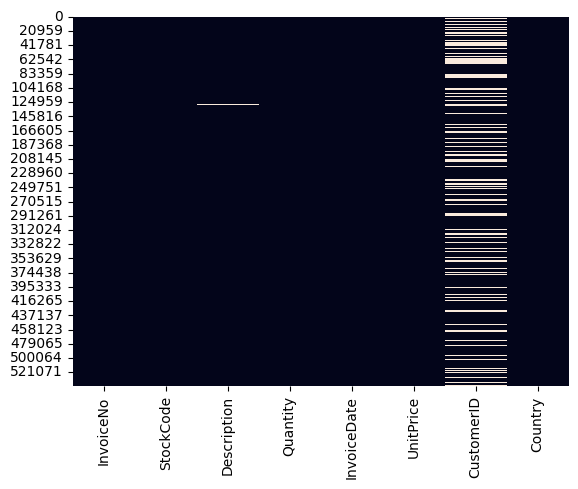

In [88]:
# Visualizing the missing values
sns.heatmap(df.isna(), cbar=False)

### What did you know about your dataset?

* It is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

* The dataset had 541909 Rows and 8 Columns, out of which 5268 were duplicates so after droping duplicates now we have 536641 rows and 8 columns.

* The  dataset also has some missing values which need to be fixed.


## ***2. Understanding Your Variables***

In [89]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [90]:
# Dataset Describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

* #### **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* #### **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* #### **Description**: Product (item) name. Nominal.
* #### **Quantity**: The quantities of each product (item) per transaction. Numeric.
* #### **InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.
* #### **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
* #### **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* #### **Country**: Country name. Nominal, the name of the country where each customer resides.

### Check Unique Values for each variable.

In [91]:
# Check Unique Values for each variable.
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [92]:
# Write your code to make your dataset analysis ready.

# Firstly making a copy of the dataset
work_df=df

In [93]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

* Here CustomerID has 135037 null values and since our analysis is based on customers, I have to remove these missing values as I can't just impute customer ID as it is a unique ID given to every customer.

In [94]:
# Dropping null CustomerID values.
work_df=work_df[pd.notnull(work_df['CustomerID'])]

In [95]:
# Rechecking null values
work_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

* Now as seen in describe() method O/P Quantity and Unit Price has some negative values which can't be valid, so I have to remove them.

In [96]:
work_df=work_df[work_df['Quantity']>0]
work_df=work_df[work_df['UnitPrice']>0]

In [97]:
# Checking new shape
work_df.shape

(392692, 8)

* As mentioned in Invoice number description it is a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation and which means these Invoice no. should be dropped before analysis.

In [98]:
# Converting column to string
work_df['InvoiceNo'] = work_df['InvoiceNo'].astype('str')

# Dropping InvoiceNo.s containing C
work_df=work_df[~work_df['InvoiceNo'].str.contains('C'or'c')]

In [99]:
# Checking new shape
work_df.shape

(392692, 8)

* The shape remains same after filtering invoice no. which means no cancelled orders are present.

In [100]:
# Creating Total Price column
work_df['Total Price']=work_df['Quantity']*work_df['UnitPrice']

In [102]:
# Creating day column for analysis
work_df['Day']=work_df['InvoiceDate'].dt.day

In [127]:
# Creating date column for analysis
work_df['Date']=work_df['InvoiceDate'].dt.date

In [193]:
# Creating hour column for analysis
work_df["hour"]=work_df['InvoiceDate'].dt.hour

In [194]:
work_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Month,Day,Date,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,1,2010-12-01,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,1,2010-12-01,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,1,2010-12-01,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,1,2010-12-01,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,1,2010-12-01,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,December,9,2011-12-09,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,December,9,2011-12-09,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,December,9,2011-12-09,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,December,9,2011-12-09,12


### What all manipulations have you done and insights you found?

* Firstly I created a copy of the dataset.

* Then I dropped null 'CustomerID' values since our analysis is based on customers and imputing 'CustomerID' is not possible as it is a unique ID given to every customer.

* After that 'Quantity' and 'Unit Price' had some negative values which can't be valid, so I removed them.

* Then as mentioned in Invoice number description, it is a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation so I tried dropping them but the datset had no cancelled orders.

* Finally I created a 3 columns named 'Total Price' i.e.'Quantity' multiplied by 'UnitPrice', 'Day'- day no. of month, 'Date' - extracted from datetime and 'Hour' for analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart 1 - Highest Invoice Generated

In [105]:
# creating a df to check invoice generated with highest amount
Invoice_df=work_df.groupby(['InvoiceNo']).agg({'Description':'count','Total Price':'sum'}).reset_index().rename(columns={'Description':'No. of Items','Total Price':'Invoice Amount'}).sort_values('Invoice Amount',ascending=False)
Invoice_df.head(10)

,InvoiceNo,No. of Items,Invoice Amount
18499,581483,1,168469.60
1909,541431,1,77183.60
7925,556444,1,38970.00
12417,567423,12,31698.16
8111,556917,138,22775.93
14456,572209,7,22206.00
12409,567381,12,22104.80
10842,563614,97,21880.44
5462,550461,5,21535.90
14368,572035,125,20277.92


In [106]:
# Higest generated invoice details
work_df[work_df['InvoiceNo']=='581483']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Month,Day
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6,December,9


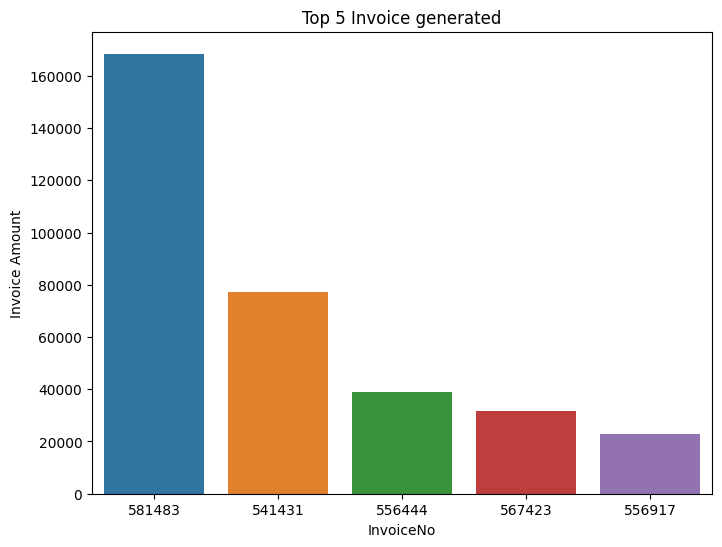

In [71]:
plt.figure(figsize=(8,6))
plt.title('Top 5 Invoice generated')
sns.barplot(x='InvoiceNo',y='Invoice Amount',data=Invoice_df[:5])
# plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

* I used a simple bar plot here to show top 5 highest amount invoices generated.

##### 2. What is/are the insight(s) found from the chart?

* From this chart I can say that the invoice no. 581483 was the highest amount invoice generated and it contained a single unique item of 2.08 unit price and 80995 quantity. The invoice was generate on 2011-12-09 09:15:00 .The reason behind this might be a stock clearence sale or something related.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* No significant insights were found here that could help create a positive business impact.

#### Chart 2 - Best Products

In [107]:
# Creating a Description_df containing counts of no. of times each item was ordered irrespetive of quantity.
Description_df=work_df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389


In [108]:
Description_df.tail()

,Description_Name,Count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


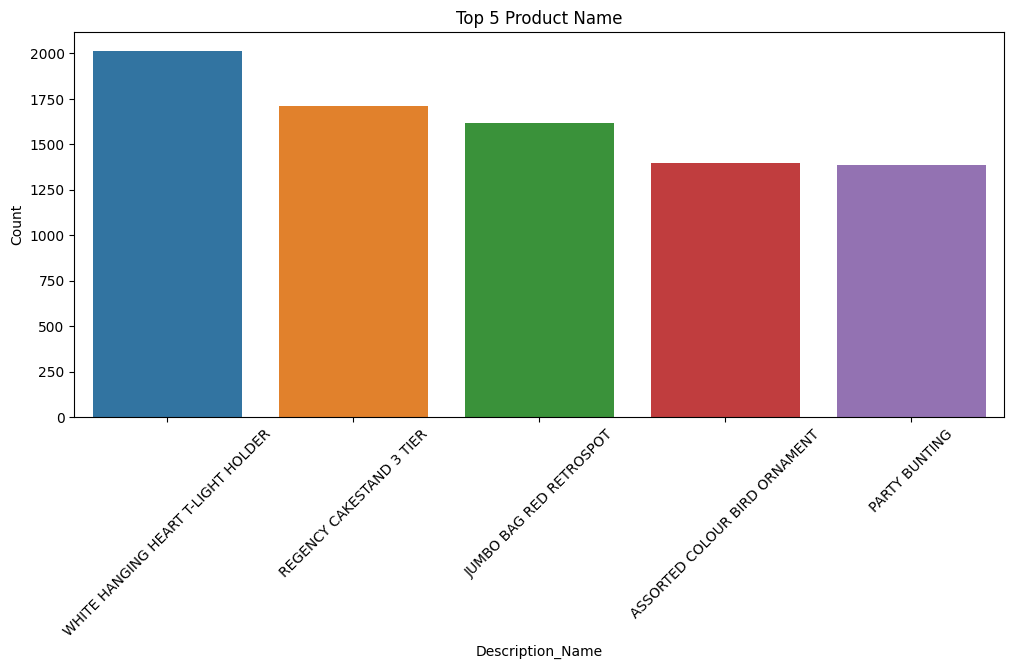

In [125]:
plt.figure(figsize=(12,5))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])
plt.xticks(rotation=45)
plt.show()

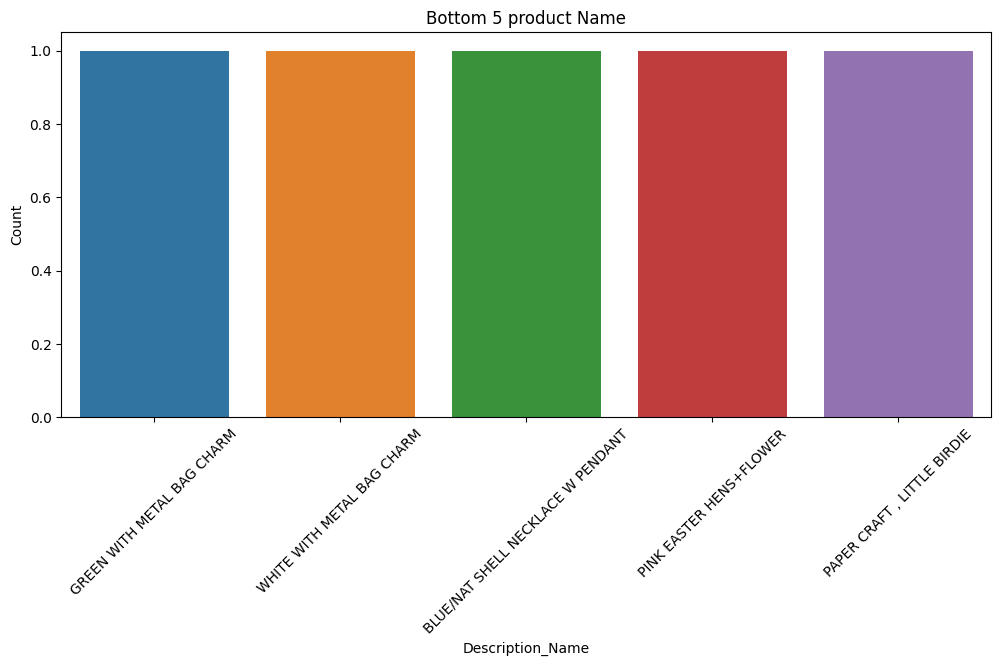

In [126]:
plt.figure(figsize=(12,5))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

* I again used barplot here as it is very good in comparing catgories or values.

##### 2. What is/are the insight(s) found from the chart?

**Top 5 most ordered products**:
1. WHITE HANGING HEART T-LIGHT HOLDER,
2. REGENCY CAKESTAND 3 TIER
3. JUMBO BAG RED RETROSPOT
4. LUNCH BAG RED RETROSPOT
5. PARTY BUNTING

**Bottom 5 products**:
1. GREEN WITH METAL BAG CHARM
2. WHITE WITH METAL BAG CHARM
3. BLUE/NAT SHELL NECKLACE W PENDANT
4. PINK EASTER HENS+FLOWER
5. PAPER CRAFT , LITTLE BIRDIE

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* This insight can help the business focus on promoting and optimizing these products, ensuring their availability, and potentially expanding the product line with similar items to cater to customer demand. It can also inform inventory management decisions to ensure sufficient stock of these popular products.

#### Chart 3 - Best Stocks

In [117]:
# Creating a StockCode_df with its value_counts
StockCode_df=work_df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
StockCode_df.head()

,StockCode_Name,Count
0,85123A,2023
1,22423,1713
2,85099B,1615
3,84879,1395
4,47566,1389


In [118]:
StockCode_df.tail()

,StockCode_Name,Count
3660,90059A,1
3661,20678,1
3662,90059D,1
3663,90168,1
3664,23843,1


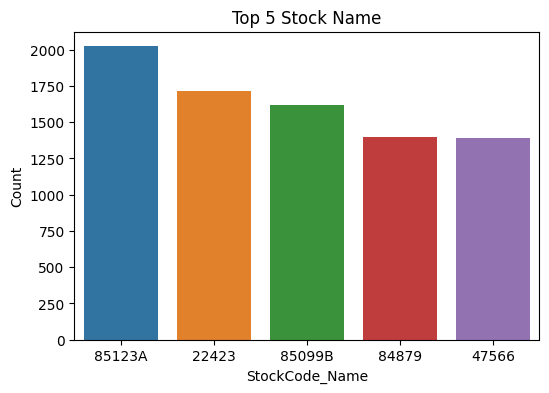

In [123]:
# Plotting barplot for top 5 Stockcode
plt.figure(figsize=(6,4))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])
plt.show()

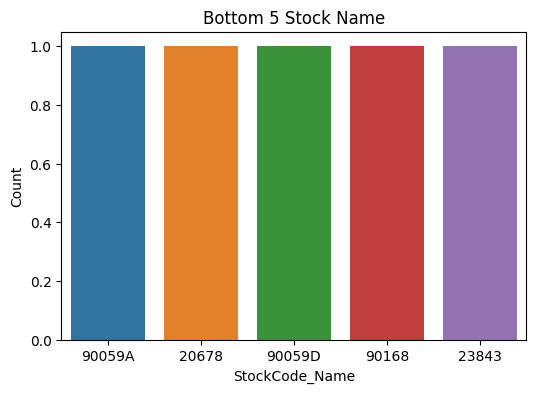

In [124]:
# Plotting barplot for bottom 5 Stockcode
plt.figure(figsize=(6,4))
plt.title('Bottom 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[-5:])
plt.show()

##### 1. Why did you pick the specific chart?

* I again used barplot here as it is very good in comparing catgories or values.

##### 2. What is/are the insight(s) found from the chart?

**Top 5 Stock name based on selling are** :
1. 85123A
2. 22423
3. 85099B
4. 84879
5. 47566

**Bottom 5 Stock name based on selling are** :
1. 90059A
2. 20678
3. 90059D
4. 90168
5. 23843

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, again these insight can help the business focus on promoting and optimizing these stock products, ensuring their availability, and potentially expanding the product line with similar items to cater to customer demand. It can also inform inventory management decisions to ensure sufficient stock of these popular products.

#### Chart 4 - Time Series Analysis

In [129]:
time_series_df=work_df.groupby('Date')['Total Price'].sum()
time_series_df

Date
2010-12-01     46192.49
2010-12-02     47197.57
2010-12-03     23876.63
2010-12-05     31361.28
2010-12-06     31009.33
                ...    
2011-12-05     58081.09
2011-12-06     45989.66
2011-12-07     69230.60
2011-12-08     50395.96
2011-12-09    184329.66
Name: Total Price, Length: 305, dtype: float64

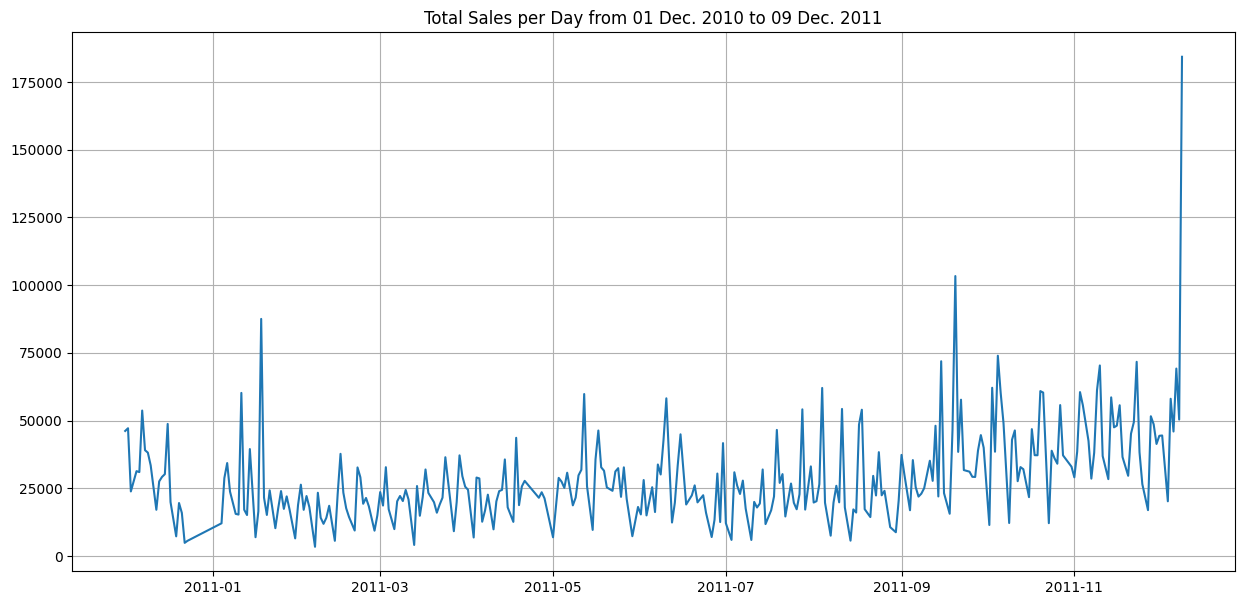

In [131]:
# Chart - 4 visualization code
plt.figure(figsize=(15, 7))
plt.plot(time_series_df)
plt.title('Total Sales per Day from 01 Dec. 2010 to 09 Dec. 2011')
plt.grid(True)
plt.show()

In [145]:
# Function to plot moving average
from sklearn.metrics import mean_absolute_error
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")

        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)

    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

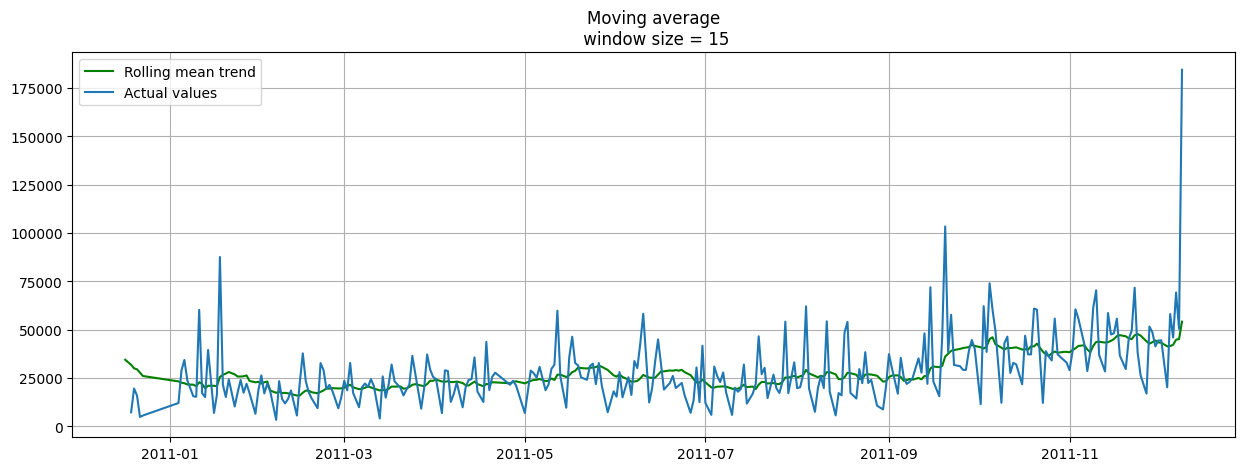

In [142]:
# rolling average for 5 days window
plotMovingAverage(time_series_df, 15)

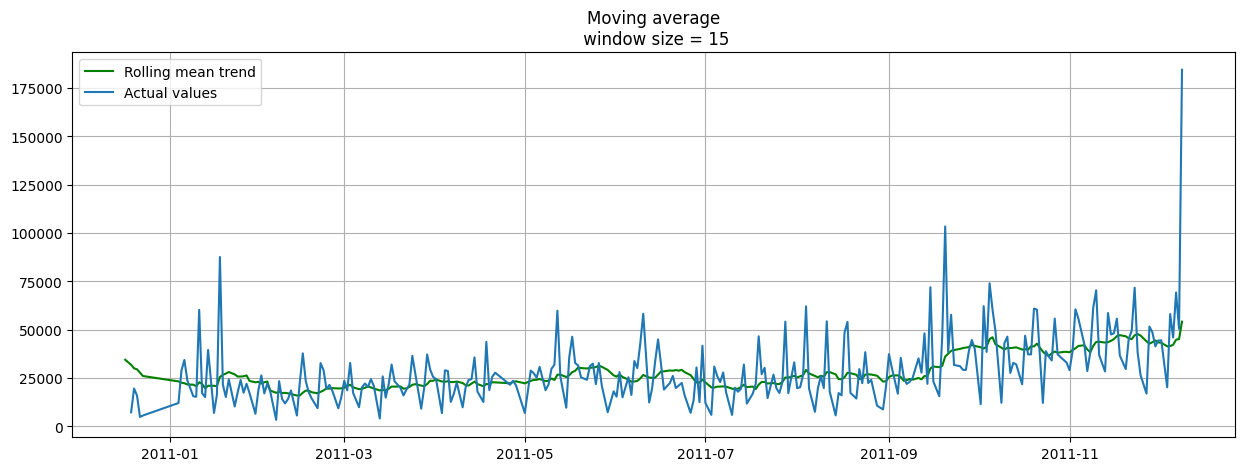

In [143]:
# rolling average for 15 days window
plotMovingAverage(time_series_df, 15)

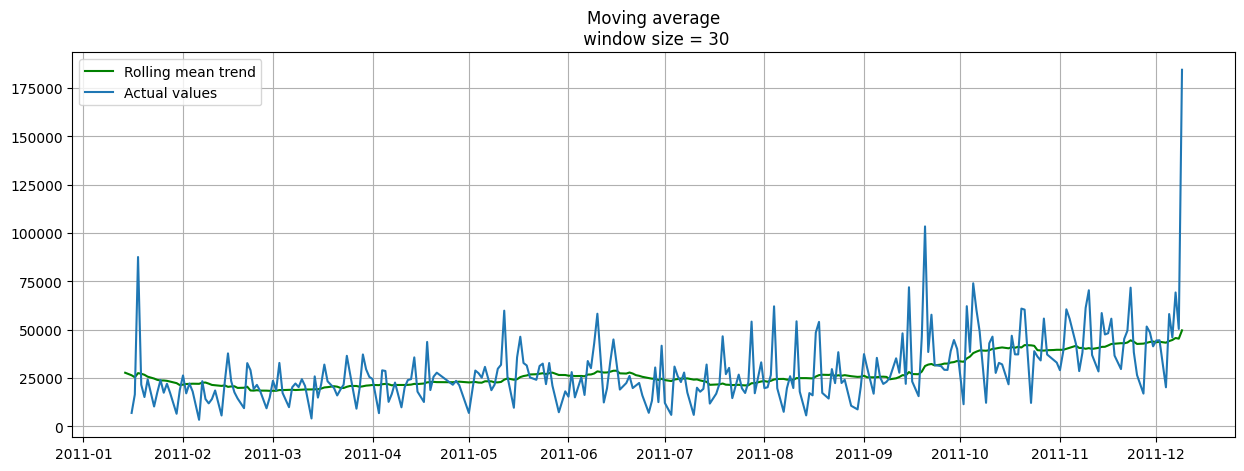

In [144]:
# rolling average for 30 days window
plotMovingAverage(time_series_df, 30)

##### 1. Why did you pick the specific chart?

I have picked simple line chart as it is best for Time Series Analysis.

##### 2. What is/are the insight(s) found from the chart?

Based on the smoothened plot I can say that there is a gradual increase in Total sales amount generated per day which is a good sign for business.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the gradual increase in total sales amount over time allows the business to forecast future revenue trends. By analyzing historical patterns and projecting them into the future, the business can estimate future sales performance and adjust strategies accordingly, such as setting sales targets, budgeting, and resource allocation.

#### Chart 5 - Sales vs Month Days

In [148]:
# Creating a day_df for analyzing sales with days of month.
day_df=work_df.groupby('Day')['Total Price'].sum()

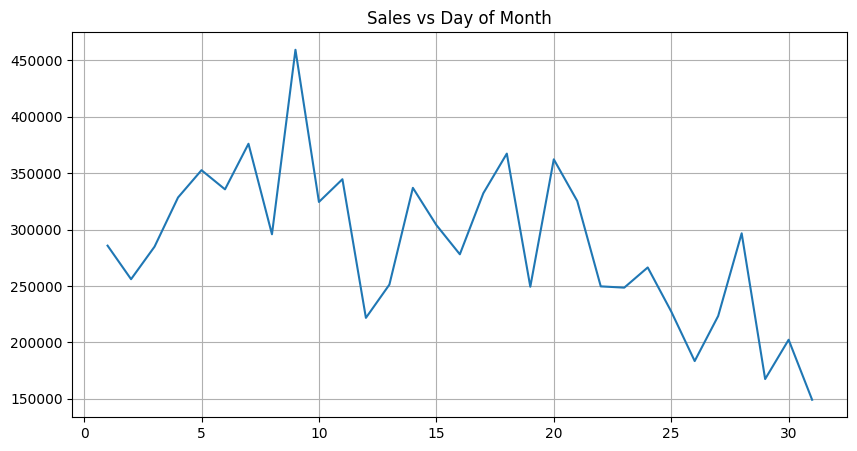

In [154]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 5))
plt.plot(day_df)
plt.title('Sales vs Day of Month')
plt.grid(True)
plt.show()

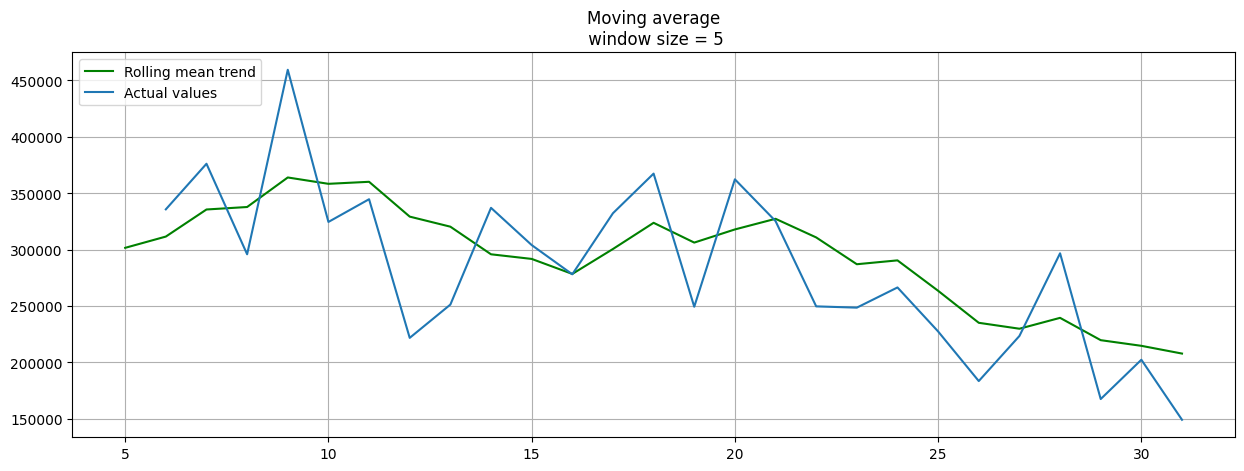

In [153]:
# rolling average for 5 days window
plotMovingAverage(day_df, 5)

##### 1. Why did you pick the specific chart?

* I have again used linchart here and then smoothened it show trend of sales amount vs days of month.

##### 2. What is/are the insight(s) found from the chart?

* Sales peak during the first ten days of the month and then start to decline. This may be because individuals tend to spend more at the beginning of the month since they often receive their paychecks at the end of the current month or at the beginning of the next one.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* The insight that sales are highest during the first 10 days of the month and gradually decrease towards the end can potentially create a positive business impact. It allows the business to focus marketing efforts, promotions, and inventory management strategies during the early days when sales are typically high. It helps in maximizing revenue generation and ensuring sufficient stock availability during peak periods.
* However, it also highlight potential challenges in sales during the latter half of the month, requiring the business to analyze the reasons behind the decline and implement strategies to sustain or boost sales during that period. Neglecting to address this decline may lead to negative growth in sales during the latter part of the month.

#### Chart 6 - Top Products

In [163]:
# Creating a quantiy_df for checking item for which most quantity is ordered
quantity_df=work_df.groupby('Description')['Quantity'].sum().reset_index().rename(columns={'Quantity':'Total Quantity Ordered'}).sort_values('Total Quantity Ordered',ascending=False)
quantity_df.head()

,Description,Total Quantity Ordered
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1762,JUMBO BAG RED RETROSPOT,46078
3698,WHITE HANGING HEART T-LIGHT HOLDER,36706


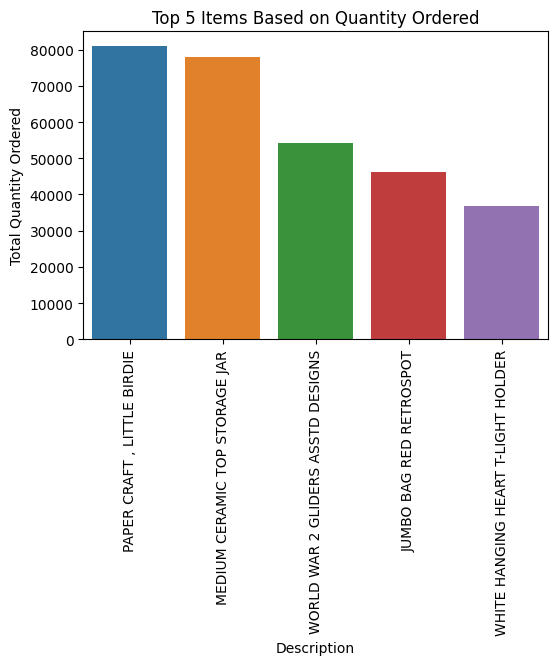

In [166]:
# Plotting barplot for top 5 items based on quantity ordered
plt.figure(figsize=(6,4))
plt.title('Top 5 Items Based on Quantity Ordered')
sns.barplot(x='Description',y='Total Quantity Ordered',data=quantity_df[:5])
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

* I again used barplot here as it is very good in comparing catgories or values.

##### 2. What is/are the insight(s) found from the chart?

**Top 5 Items Based on Quantity Ordered**:
1. PAPER CRAFT , LITTLE BIRDIE
2. MEDIUM CERAMIC TOP STORAGE JAR
3. WORLD WAR 2 GLIDERS ASSTD DESIGNS
4. JUMBO BAG RED RETROSPOT
5. WHITE HANGING HEART T-LIGHT HOLDER

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* This information may assist the company in concentrating on marketing and optimising these products, assuring their availability, and possibly growing the product line with comparable items to meet consumer demand. Making informed judgements about inventory management can help keep plenty of these well-liked goods on hand.

#### Chart 7 - Countries vs No. of Customers

In [177]:
# Creating a country_df to find countries with most customers
customer_country=work_df[['Country','CustomerID']].drop_duplicates()
country_df=customer_country.groupby(['Country'])['CustomerID'].count().reset_index().rename(columns={'CustomerID':'No. of Customers'}).sort_values('No. of Customers',ascending=False)
country_df.head()

,Country,No. of Customers
35,United Kingdom,3920
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25


In [180]:
country_df.tail()

,Country,No. of Customers
28,Saudi Arabia,1
29,Singapore,1
16,Iceland,1
4,Brazil,1
11,European Community,1


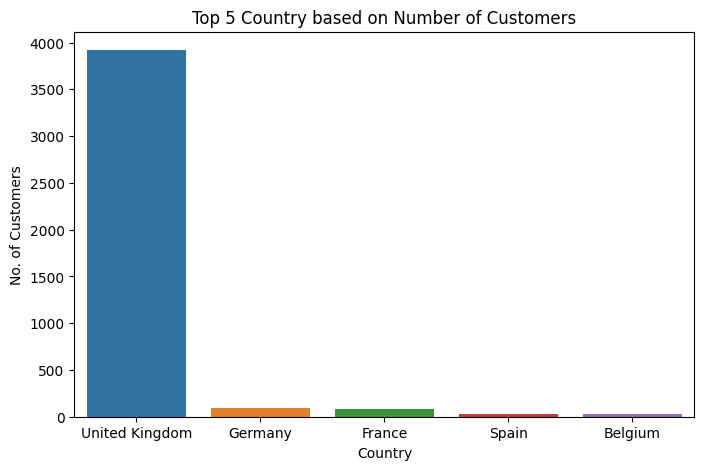

In [185]:
# Chart - 7 visualization code
plt.figure(figsize=(8,5))
plt.title('Top 5 Country based on Number of Customers')
sns.barplot(x='Country',y='No. of Customers',data=country_df[:5])
plt.show()

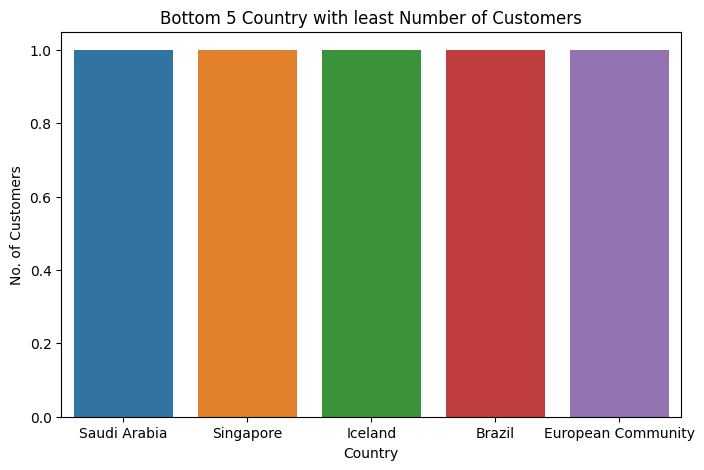

In [182]:
plt.figure(figsize=(8,5))
plt.title('Bottom 5 Country with least Number of Customers')
sns.barplot(x='Country',y='No. of Customers',data=country_df[-5:])
plt.show()

##### 1. Why did you pick the specific chart?

* I again used barplot here as it is very good in comparing catgories or values.

##### 2. What is/are the insight(s) found from the chart?

**Top 5 Country based on Number of Customers**:
1. United Kingdom (approx 90% customers)
2. Germany
3. France
4. Spain
5. Belgium

**Bottom 5 Country with least Number of Customers**:
1. Saudi Arabia
2. Singapore
3. Iceland
4. Brazil
5. European Community

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, this insight highlights the importance of catering to the needs and preferences of customers from these countries, allowing the business to tailor marketing strategies, customer support, and localization efforts to maximize sales and customer satisfaction.

#### Chart 8 - Unit Price Distribution plot

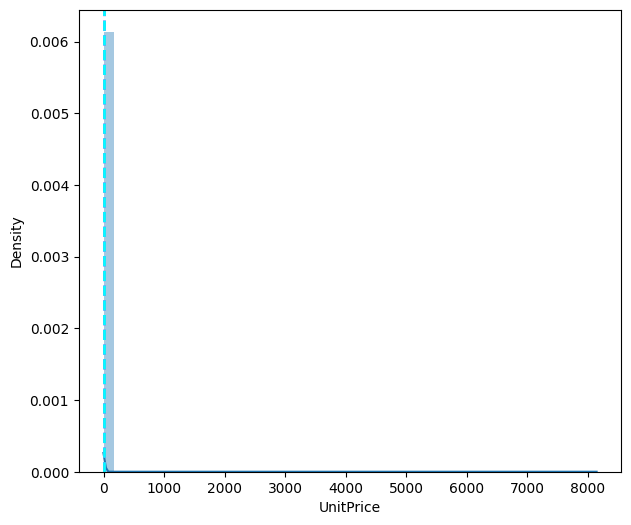

In [187]:
# Chart - 8 visualization code
plt.figure(figsize=(7,6))
ax=sns.distplot(work_df['UnitPrice'])
ax.axvline(work_df['UnitPrice'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(work_df['UnitPrice'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

##### 1. Why did you pick the specific chart?

* I have used a seaborn distplot here to check the distribution of UnitPrice.

##### 2. What is/are the insight(s) found from the chart?

* In the plot we can see that it is highly positive skewed, which means most of the values are low and few values are high.

#### Chart 9 - Quantity Distribution Plot

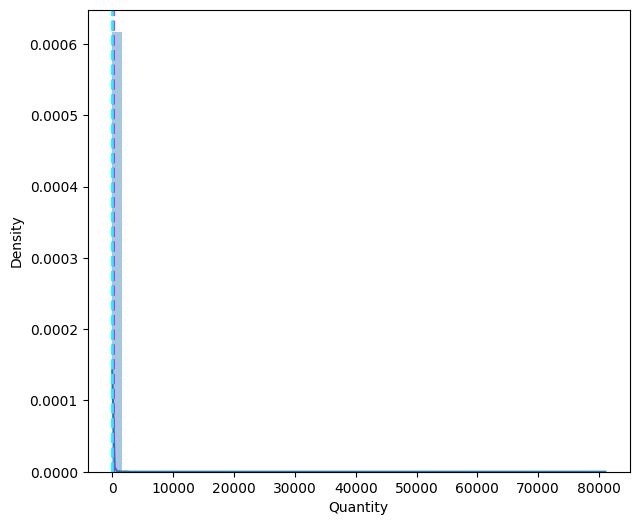

In [188]:
# Chart - 9 visualization code
plt.figure(figsize=(7,6))
ax=sns.distplot(work_df['Quantity'])
ax.axvline(work_df['Quantity'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(work_df['Quantity'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

##### 1. Why did you pick the specific chart?

* I have used a seaborn distplot here to check the distribution of UnitPrice.

##### 2. What is/are the insight(s) found from the chart?

* In this 'Quantity' distribution plot again we can see that it is highly positive skewed, which means most of the values are low and few values are high which is justified as normally people order very low quantity (mostly 1) of items, high quantity item orders are rare and usually occur during flash sales or stock clearence sales etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* To create a positive business impact, the business should leverage the insight to optimize inventory management, streamline supply chain processes, and design effective promotions to encourage higher quantity orders. Failing to do so might result in missed opportunities for increased sales and customer engagement.

#### Chart 10 - Busiest Hours

In [196]:
# Creating hour_df to find busiest hours
hour_df=work_df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

,Hour_Name,Count
0,12,70938
1,13,63019
2,14,53251
3,11,48365
4,15,44790
5,10,37773
6,16,23715
7,9,21927
8,17,12941
9,8,8687


<Axes: title={'center': 'Hour'}, xlabel='Hour_Name', ylabel='Count'>

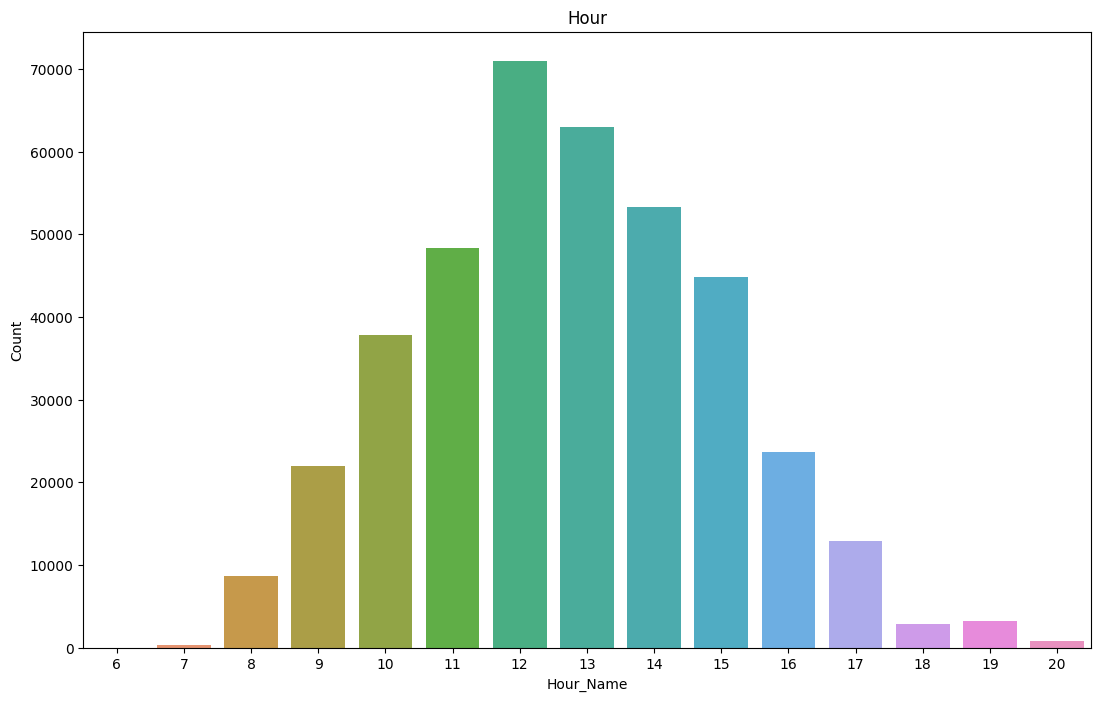

In [197]:
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

##### 1. Why did you pick the specific chart?

* I have again used a barplot here to compare value_counts for different hours.

##### 2. What is/are the insight(s) found from the chart?

* The insight found from the chart is that noon hours around 9 am to 4 pm are the most busy hours and it peaks around 11 am to 1 pm.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* To create a positive business impact, the business should leverage the insight to optimize inventory management during peak hours, streamline supply chain processes, and design effective promotions to encourage higher quantity orders. Failing to do so might result in missed opportunities for increased sales and customer engagement.

#### Chart - 11 - Correlation Heatmap

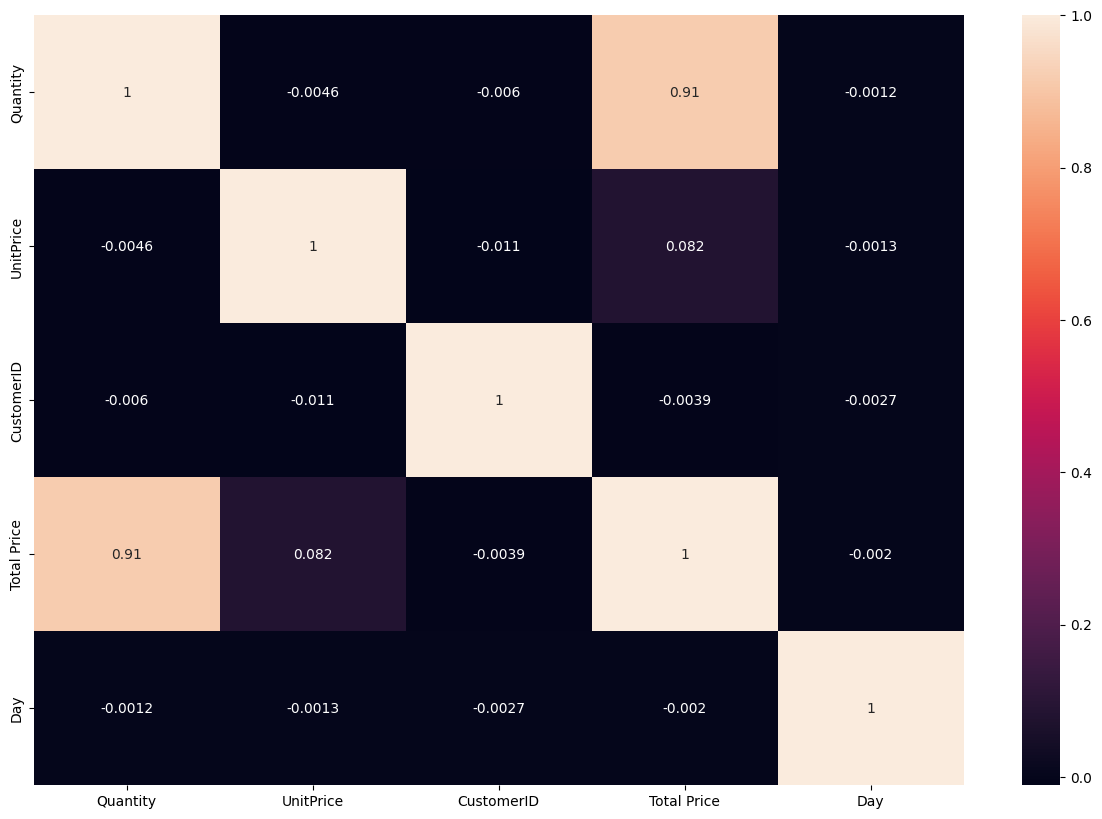

In [191]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(work_df.corr(), annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

* A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

* Thus to know the correlation between all the variables along with the correlation coeficients, I used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

* From the heatmap we can see that the variable 'Total Price' is high positively correlated with 'Quantiy' more than 'UnitPrice'. This suggests that high Total Price values are mostly due to high quantity orders.
* So putting more emphasis on this insight can lead to higher business growths.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***